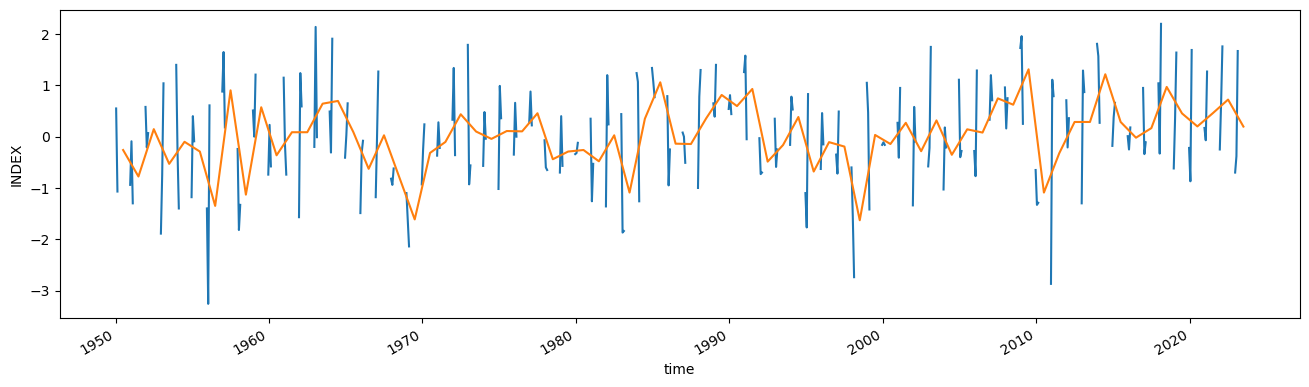

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helpers import get_TNH_idx

# Monthly Teleconnection Index: Tropical/ Northern Hemisphere (TNH) Pattern
# get data from ftp://ftp.cpc.ncep.noaa.gov/wd52dg/data/indices/tnh_index.tim (downloaded at 20.06.2023 T17:00)
# Indices are normalized using the 1981-2010 base period monthly means and standard deviations.
# Values are set to -99.90 for calendar months when the pattern
# is not normally a leading mode of variability.

TNH = get_TNH_idx(dropna=False)

fig = plt.figure(figsize=(16,4))

TNH.plot()
# shift december into the next year
TNH_ann = TNH.assign_coords(time=TNH.time+pd.Timedelta(days=31)).groupby('time.year').mean()
TNH_ann = TNH_ann.assign_coords(time=('year',pd.to_datetime(TNH_ann.year,format='%Y')+pd.Timedelta(days=180))).swap_dims(dict(year='time'))
TNH_ann.plot()

In [128]:
np.unique(TNH.TIME.dt.month)

array([ 1,  2, 12], dtype=int64)

In [47]:
pd.Timestamp(year=TNH.year)

AttributeError: 'DataFrame' object has no attribute 'year'

In [44]:
pd.Timedelt

TypeError: Invalid type <class 'pandas.core.series.Series'>. Must be int or float.